In [35]:
import altair as alt
import pandas as pd
import polars as pl

In [37]:
def download_tzdata_windows(
    base_dir=None,
    year=2022,
    name="tzdata"
):
    import os
    import tarfile
    import urllib3

    http = urllib3.PoolManager()
    folder = base_dir if base_dir else os.path.join(os.path.expanduser('~'), "Downloads")
    tz_path = os.path.join(folder, "tzdata.tar.gz")

    with open(tz_path, "wb") as f:
        f.write(http.request('GET', f'https://data.iana.org/time-zones/releases/tzdata{year}f.tar.gz').data)

    folder = os.path.join(folder, name)

    if not os.path.exists(folder):
        os.makedirs(folder)

    tarfile.open(tz_path).extractall(folder)

    with open(os.path.join(folder, "windowsZones.xml"), "wb") as f:
        f.write(http.request('GET', f'https://raw.githubusercontent.com/unicode-org/cldr/master/common/supplemental/windowsZones.xml').data)
download_tzdata_windows(year=2022)

C:\Users\mchan811\AppData\Local\Temp\ipykernel_23920\2877846596.py:22: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tarfile.open(tz_path).extractall(folder)


In [42]:
download_tzdata_windows()

C:\Users\mchan811\AppData\Local\Temp\ipykernel_23920\2877846596.py:22: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tarfile.open(tz_path).extractall(folder)


In [2]:
df_pl = pl.read_csv(
    "./On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv",
    schema_overrides=(
        {col_name: pl.Categorical for col_name in [
            "Dest", "Tail_Number", "IATA_CODE_Reporting_Airline", "CancellationCode"
        ]}
        | {"FlightDate": pl.Date}
        | {col_name: pl.Utf8 for col_name in [
            "DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"
        ]}
    ),
    null_values="",
)
print(df_pl.shape)
df_pl.sample(10)

(537902, 110)


Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,…,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,
i64,i64,i64,i64,i64,date,str,i64,cat,cat,i64,i64,i64,i64,str,str,str,i64,str,i64,i64,i64,i64,cat,str,str,i64,str,i64,str,str,f64,f64,f64,i64,str,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2022,1,1,3,1,2022-01-03,"""WN""",19393,"""WN""","""N8711Q""",4364,12889,1288903,32211,"""LAS""","""Las Vegas, NV""","""NV""",32,"""Nevada""",85,11292,1129202,30325,"""DEN""","""Denver, CO""","""CO""",8,"""Colorado""",82,"""1615""",null,null,null,null,null,"""1600-1659""",null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,1,1,4,2,2022-01-04,"""9E""",20363,"""9E""","""N299PQ""",4760,11423,1142307,31423,"""DSM""","""Des Moines, IA""","""IA""",19,"""Iowa""",61,11433,1143302,31295,"""DTW""","""Detroit, MI""","""MI""",26,"""Michigan""",43,"""1419""","""1413""",-6.0,0.0,0.0,-1,"""1400-1459""",8.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,1,1,4,2,2022-01-04,"""OO""",20304,"""OO""","""N453SW""",5137,13930,1393007,30977,"""ORD""","""Chicago, IL""","""IL""",17,"""Illinois""",41,12559,1255905,32559,"""JST""","""Johnstown, PA""","""PA""",42,"""Pennsylvania""",23,"""1815""","""1823""",8.0,8.0,0.0,0,"""1800-1859""",49.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,1,1,8,6,2022-01-08,"""9E""",20363,"""9E""","""N315PQ""",5449,12478,1247805,31703,"""JFK""","""New York, NY""","""NY""",36,"""New York""",22,10821,1082106,30852,"""BWI""","""Baltimore, MD""","""MD""",24,"""Maryland""",35,"""1455""","""1450""",-5.0,0.0,0.0,-1,"""1400-1459""",29.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,1,1,23,7,2022-01-23,"""WN""",19393,"""WN""","""N8554X""",12,11259,1125904,30194,"""DAL""","""Dallas, TX""","""TX""",48,"""Texas""",74,15016,1501606,31123,"""STL""","""St. Louis, MO""","""MO""",29,"""Missouri""",64,"""1100""","""1054""",-6.0,0.0,0.0,-1,"""1100-1159""",8.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,1,1,16,7,2022-01-16,"""AA""",19805,"""AA""","""N992NN""",2610,11298,1129806,30194,"""DFW""","""Dallas/Fort Worth, TX""","""TX""",48,"""Texas""",74,11193,1119302,33105,"""CVG""","""Cincinnati, OH""","""KY""",21,"""Kentucky""",52,"""1141""","""1137""",-4.0,0.0,0.0,-1,"""1100-1159""",17.0,…,null,null,null,null,null,null,null,null,null,null,nu

In [3]:
df_pd = pd.read_csv(
    "./On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv",
    dtype=(
        {col_name: pd.CategoricalDtype() for col_name in [
            "Dest", "Tail_Number", "IATA_CODE_Reporting_Airline", "CancellationCode"
        ]}
        | {col_name: pd.StringDtype() for col_name in [
            "DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"
        ]}
    ),
    na_values="",
)
print(df_pd.shape)
df_pd.sample(10)

C:\Users\mchan811\AppData\Local\Temp\ipykernel_23920\1165143170.py:1: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv(


(537902, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
450002,2022,1,1,12,3,2022-01-12,AA,19805,AA,N927NN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20134,2022,1,1,8,6,2022-01-08,OO,20304,OO,N707EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106151,2022,1,1,16,7,2022-01-16,UA,19977,UA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297101,2022,1,1,12,3,2022-01-12,WN,19393,WN,N418WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268871,2022,1,1,21,5,2022-01-21,OH,20397,OH,N706PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449782,2022,1,1,23,7,2022-01-23,AA,19805,AA,N827NN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359855,2022,1,1,6,4,2022-01-06,WN,19393,WN,N563WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61337,2022,1,1,9,7,2022-01-09,OO,20304,OO,N964SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156213,2022,1,1,21,5,2022-01-21,DL,19790,DL,N900DU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369644,2022,1,1,17,1,2022-01-17,WN,19393,WN,N8314L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
%%timeit

(
    df_pl
    .select([
        pl.col(column_name).str.split(",").list.get(0)
        for column_name in ["OriginCityName", "DestCityName"]
    ])
    .sample(10)
)

68.4 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
(
    df_pl
    .select([
        pl.col(column_name).str.split(",").list.get(0)
        for column_name in ["OriginCityName", "DestCityName"]
    ])
    .sample(10)
)

OriginCityName,DestCityName
str,str
"""Newark""","""Charlotte"""
"""Phoenix""","""Chicago"""
"""Spokane""","""Denver"""
"""Chicago""","""Sacramento"""
"""Chicago""","""Pittsburgh"""
"""Dallas""","""Washington"""
"""Atlanta""","""Denver"""
"""New York""","""Charleston"""
"""Chattanooga""","""Atlanta"""


In [8]:
%%timeit

(
    df_pd
    .assign(**{
        col: lambda df: df[col].str.split(",", regex=False).str[0]
        for col in ["OriginCityName", "DestCityName"]
    })
    .loc[:, ["OriginCityName", "DestCityName"]]
    .sample(10)
)

1.64 s ± 273 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
(
    df_pd
    .assign(**{
        col: lambda df: df[col].str.split(",", regex=False).str[0]
        for col in ["OriginCityName", "DestCityName"]
    })
    .loc[:, ["OriginCityName", "DestCityName"]]
    .sample(10)
)

,OriginCityName,DestCityName
358465,Los Angeles,Los Angeles
366687,Chicago,Chicago
432221,Raleigh/Durham,Raleigh/Durham
336717,Baltimore,Baltimore
443050,Raleigh/Durham,Raleigh/Durham
397921,Indianapolis,Indianapolis
500118,Newark,Newark
184500,Atlanta,Atlanta
13216,Salt Lake City,Salt Lake City
103757,West Palm Beach/Palm Beach,West Palm Beach/Palm Beach


In [12]:
def extract_city_name_pl() -> pl.Expr:
    """Chicago, IL -> Chigaco for OriginCityName and DestCityName"""
    cols = ["OriginCityName", "DestCityName"]

    return pl.col(cols).str.split(",").list.get(0)


def extract_city_name_pd(df: pd.DataFrame) -> pd.DataFrame:
    """Chicago, IL -> Chigaco for OriginCityName and DestCityName"""
    return df.assign(**{
        col: lambda df_: (
            df_[col].str.split(",", regex=False).map(lambda lst: lst[0])
        )
        for col in ["OriginCityName", "DestCityName"]
    })

In [13]:
(
    df_pl
    .select("FlightDate", *[
        pl.when(pl.col(col_name) == "2400")
        .then(pl.lit("0000"))
        .otherwise(pl.col(col_name))
        .str.strptime(pl.Time, "%H%M")
        .alias(col_name)
        for col_name
        in ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]
    ])
)

FlightDate,DepTime,ArrTime,CRSArrTime,CRSDepTime
date,time,time,time,time
2022-01-14,12:21:00,13:56:00,13:52:00,12:24:00
2022-01-15,12:14:00,13:28:00,13:52:00,12:24:00
2022-01-16,12:18:00,13:39:00,13:52:00,12:24:00
2022-01-17,12:17:00,14:01:00,13:52:00,12:24:00
2022-01-18,12:18:00,13:23:00,13:52:00,12:24:00
…,…,…,…,…
2022-01-06,14:13:00,16:02:00,15:46:00,13:55:00
2022-01-06,16:26:00,19:37:00,17:22:00,14:22:00
2022-01-06,13:43:00,15:49:00,15:30:00,13:29:00


In [14]:
def time_col_pl(col_name: str) -> pl.Expr:
    """Convert to string time to pl.Time"""
    return (
        pl.when(pl.col(col_name) == "2400")
        .then(pl.lit("0000"))
        .otherwise(pl.col(col_name))
        .str.strptime(pl.Time, "%H%M")
        .alias(col_name)
    )

(
    df_pl
    .select(*[
        pl.col("FlightDate")
        .dt.combine(time_col_pl(col_name))
        .alias(col_name)
        for col_name in ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]
    ])
)

DepTime,ArrTime,CRSArrTime,CRSDepTime
datetime[μs],datetime[μs],datetime[μs],datetime[μs]
2022-01-14 12:21:00,2022-01-14 13:56:00,2022-01-14 13:52:00,2022-01-14 12:24:00
2022-01-15 12:14:00,2022-01-15 13:28:00,2022-01-15 13:52:00,2022-01-15 12:24:00
2022-01-16 12:18:00,2022-01-16 13:39:00,2022-01-16 13:52:00,2022-01-16 12:24:00
2022-01-17 12:17:00,2022-01-17 14:01:00,2022-01-17 13:52:00,2022-01-17 12:24:00
2022-01-18 12:18:00,2022-01-18 13:23:00,2022-01-18 13:52:00,2022-01-18 12:24:00
…,…,…,…
2022-01-06 14:13:00,2022-01-06 16:02:00,2022-01-06 15:46:00,2022-01-06 13:55:00
2022-01-06 16:26:00,2022-01-06 19:37:00,2022-01-06 17:22:00,2022-01-06 14:22:00
2022-01-06 13:43:00,2022-01-06 15:49:00,2022-01-06 15:30:00,2022-01-06 13:29:00


In [15]:
(
    df_pd
    .assign(**{
        col_name: lambda df: (
            pd.to_datetime(
                df["FlightDate"]
                + " "
                + df[col_name].replace("2400", "0000").str.slice(0, 2)
                + ":"
                + df[col_name].replace("2400", "0000").str.slice(2, 4),
                errors="coerce",
            )
        )
        for col_name in ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]
    })
    .loc[:, ["FlightDate", "DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]]
)

,FlightDate,DepTime,ArrTime,CRSArrTime,CRSDepTime
0,2022-01-14,2022-01-14 12:24:00,2022-01-14 12:24:00,2022-01-14 12:24:00,2022-01-14 12:24:00
1,2022-01-15,2022-01-15 12:24:00,2022-01-15 12:24:00,2022-01-15 12:24:00,2022-01-15 12:24:00
2,2022-01-16,2022-01-16 12:24:00,2022-01-16 12:24:00,2022-01-16 12:24:00,2022-01-16 12:24:00
3,2022-01-17,2022-01-17 12:24:00,2022-01-17 12:24:00,2022-01-17 12:24:00,2022-01-17 12:24:00
4,2022-01-18,2022-01-18 12:24:00,2022-01-18 12:24:00,2022-01-18 12:24:00,2022-01-18 12:24:00
...,...,...,...,...,...
537897,2022-01-06,2022-01-06 13:55:00,2022-01-06 13:55:00,2022-01-06 13:55:00,2022-01-06 13:55:00
537898,2022-01-06,2022-01-06 14:22:00,2022-01-06 14:22:00,2022-01-06 14:22:00,2022-01-06 14:22:00
537899,2022-01-06,2022-01-06 13:29:00,2022-01-06 13:29:00,2022-01-06 13:29:00,2022-01-06 13:29:00
537900,2022-01-06,2022-01-06 12:58:00,2022-01-06 12:58:00,2022-01-06 12:58:00,2022-01-06 12:58:00


In [16]:
def time_col_pd(col_name: str, df: pd.DataFrame) -> pd.Series:
    """Convert to string time to pl.Time"""
    return (
        pd.to_datetime(
            df["FlightDate"]
            + " "
            + df[col_name].replace("2400", "0000").str.slice(0, 2)
            + ":"
            + df[col_name].replace("2400", "0000").str.slice(2, 4),
            errors="coerce",
        )
    )


(
    df_pd
    .assign(**{
        col_name: lambda df: time_col_pd(col_name, df)
        for col_name in ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]
    })
    .loc[:, ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]]
)

,DepTime,ArrTime,CRSArrTime,CRSDepTime
0,2022-01-14 12:24:00,2022-01-14 12:24:00,2022-01-14 12:24:00,2022-01-14 12:24:00
1,2022-01-15 12:24:00,2022-01-15 12:24:00,2022-01-15 12:24:00,2022-01-15 12:24:00
2,2022-01-16 12:24:00,2022-01-16 12:24:00,2022-01-16 12:24:00,2022-01-16 12:24:00
3,2022-01-17 12:24:00,2022-01-17 12:24:00,2022-01-17 12:24:00,2022-01-17 12:24:00
4,2022-01-18 12:24:00,2022-01-18 12:24:00,2022-01-18 12:24:00,2022-01-18 12:24:00
...,...,...,...,...
537897,2022-01-06 13:55:00,2022-01-06 13:55:00,2022-01-06 13:55:00,2022-01-06 13:55:00
537898,2022-01-06 14:22:00,2022-01-06 14:22:00,2022-01-06 14:22:00,2022-01-06 14:22:00
537899,2022-01-06 13:29:00,2022-01-06 13:29:00,2022-01-06 13:29:00,2022-01-06 13:29:00
537900,2022-01-06 12:58:00,2022-01-06 12:58:00,2022-01-06 12:58:00,2022-01-06 12:58:00


In [17]:
category_cols = [
    "Dest",
    "Tail_Number",
    "IATA_CODE_Reporting_Airline",
    "CancellationCode",
]
time_cols = ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]
cols = (
    category_cols
    + time_cols
    + [
        "FlightDate",
        "Flight_Number_Reporting_Airline",
        "OriginCityName",
        "DestCityName",
        "Origin",
        "DepDelay",
    ]
)

In [21]:
def time_to_datetime_pl(columns: list[str]) -> list[pl.Expr]:
    """Combine date and time into datetime dtype."""
    return ([
        pl.col("FlightDate")
        .dt.combine(time_col_pl(col))
        .alias(col)
        for col in columns
    ])


dtypes_pl = (
    {col: pl.Categorical for col in category_cols}
    | {"FlightDate": pl.Date}
    | {col: pl.Utf8 for col in time_cols}
)

df_pl_parsed = (
    pl.scan_csv(
        "./On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv",
        schema_overrides=dtypes_pl,
        null_values="",
    )
    .select(cols)
    .with_columns([
        extract_city_name_pl(),
        *time_to_datetime_pl(time_cols)
    ])
)
df_pl_parsed.collect()

Dest,Tail_Number,IATA_CODE_Reporting_Airline,CancellationCode,DepTime,ArrTime,CRSArrTime,CRSDepTime,FlightDate,Flight_Number_Reporting_Airline,OriginCityName,DestCityName,Origin,DepDelay
cat,cat,cat,cat,datetime[μs],datetime[μs],datetime[μs],datetime[μs],date,i64,str,str,str,f64
"""DCA""","""N119HQ""","""YX""",null,2022-01-14 12:21:00,2022-01-14 13:56:00,2022-01-14 13:52:00,2022-01-14 12:24:00,2022-01-14,4879,"""Columbus""","""Washington""","""CMH""",-3.0
"""DCA""","""N122HQ""","""YX""",null,2022-01-15 12:14:00,2022-01-15 13:28:00,2022-01-15 13:52:00,2022-01-15 12:24:00,2022-01-15,4879,"""Columbus""","""Washington""","""CMH""",-10.0
"""DCA""","""N412YX""","""YX""",null,2022-01-16 12:18:00,2022-01-16 13:39:00,2022-01-16 13:52:00,2022-01-16 12:24:00,2022-01-16,4879,"""Columbus""","""Washington""","""CMH""",-6.0
"""DCA""","""N405YX""","""YX""",null,2022-01-17 12:17:00,2022-01-17 14:01:00,2022-01-17 13:52:00,2022-01-17 12:24:00,2022-01-17,4879,"""Columbus""","""Washington""","""CMH""",-7.0
"""DCA""","""N420YX""","""YX""",null,2022-01-18 12:18:00,2022-01-18 13:23:00,2022-01-18 13:52:00,2022-01-18 12:24:00,2022-01-18,4879,"""Columbus""","""Washington""","""CMH""",-6.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ATL""","""N101DQ""","""DL""",null,2022-01-06 14:13:00,2022-01-06 16:02:00,2022-01-06 15:46:00,2022-01-06 13:55:00,2022-01-06,1576,"""Cleveland""","""Atlanta""","""CLE""",18.0
"""MIA""","""N883DN""","""DL""",null,2022-01-06 16:26:00,2022-01-06 19:37:00,2022-01-06 17:22:00,2022-01-06 14:22:00,2022-01-06,1577,"""Detroit""","""Miami""","""DTW""",124.0
"""ATL""","""N831DN""","""DL""",null,2022-01-06 13:43:00,2022-01-06 15:49:00,2022-01-06 15:30:00,2022-01-06 13:29:00,2022-01-06,1578,"""Baltimore""","""Atlanta""","""BWI""",14.0


In [23]:
def time_to_datetime_pd(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    """Combine time and date into datetime."""
    return df.assign(**{
        col: lambda df_: time_col_pd(col, df_) for col in columns
    })


dtypes_pd = (
    {col: pd.CategoricalDtype() for col in category_cols}
    | {col: pd.StringDtype() for col in time_cols}
)

df_pd_parsed = (
    pd.read_csv(
        "./On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv",
        dtype=dtypes_pd,
        usecols=cols,
        na_values="",
    )
    .pipe(extract_city_name_pd)
    .pipe(time_to_datetime_pd, time_cols)
    .assign(FlightDate=lambda df: pd.to_datetime(df["FlightDate"]))
)

df_pd_parsed

,FlightDate,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,Dest,DestCityName,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,CancellationCode
0,2022-01-14,YX,N119HQ,4879,CMH,Washington,DCA,Washington,2022-01-14 12:24:00,2022-01-14 12:24:00,-3.0,2022-01-14 12:24:00,2022-01-14 12:24:00,NaN
1,2022-01-15,YX,N122HQ,4879,CMH,Washington,DCA,Washington,2022-01-15 12:24:00,2022-01-15 12:24:00,-10.0,2022-01-15 12:24:00,2022-01-15 12:24:00,NaN
2,2022-01-16,YX,N412YX,4879,CMH,Washington,DCA,Washington,2022-01-16 12:24:00,2022-01-16 12:24:00,-6.0,2022-01-16 12:24:00,2022-01-16 12:24:00,NaN
3,2022-01-17,YX,N405YX,4879,CMH,Washington,DCA,Washington,2022-01-17 12:24:00,2022-01-17 12:24:00,-7.0,2022-01-17 12:24:00,2022-01-17 12:24:00,NaN
4,2022-01-18,YX,N420YX,4879,CMH,Washington,DCA,Washington,2022-01-18 12:24:00,2022-01-18 12:24:00,-6.0,2022-01-18 12:24:00,2022-01-18 12:24:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537897,2022-01-06,DL,N101DQ,1576,CLE,Atlanta,ATL,Atlanta,2022-01-06 13:55:00,2022-01-06 13:55:00,18.0,2022-01-06 13:55:00,2022-01-06 13:55:00,NaN
537898,2022-01-06,DL,N883DN,1577,DTW,Miami,MIA,Miami,2022-01-06 14:22:00,2022-01-06 14:22:00,124.0,2022-01-06 14:22:00,2022-01-06 14:22:00,NaN
537899,2022-01-06,DL,N831DN,1578,BWI,Atlanta,ATL,Atlanta,2022-01-06 13:29:00,2022-01-06 13:29:00,14.0,2022-01-06 13:29:00,2022-01-06 13:29:00,NaN
537900,2022-01-06,DL,N989AT,1579,CLT,Atlanta,ATL,Atlanta,2022-01-06 12:58:00,2022-01-06 12:58:00,-1.0,2022-01-06 12:58:00,2022-01-06 12:58:00,NaN


In [24]:
%%timeit

(
    pl.scan_csv(
        "./On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv",
        schema_overrides=dtypes_pl,
        null_values="",
    )
    .select(cols)
    .with_columns([
        extract_city_name_pl(),
        *time_to_datetime_pl(time_cols)
    ])
    .collect()
)

961 ms ± 506 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit

(
    pd.read_csv(
        "./On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv",
        dtype=dtypes_pd,
        usecols=cols,
        na_values="",
    )
    .pipe(extract_city_name_pd)
    .pipe(time_to_datetime_pd, time_cols)
    .assign(FlightDate=lambda df: pd.to_datetime(df["FlightDate"]))
)

16.1 s ± 3.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
df_pl_parsed.select(
    pl.col("IATA_CODE_Reporting_Airline")
    .value_counts(sort=True)
    .struct.field("IATA_CODE_Reporting_Airline")
    .head(5)
).collect()

IATA_CODE_Reporting_Airline
cat
"""WN"""
"""AA"""
"""DL"""
"""OO"""
"""UA"""


In [27]:
df_pl_pivot = (
    df_pl_parsed
    .drop_nulls(subset=["DepTime", "IATA_CODE_Reporting_Airline"])
    .filter(
        pl.col("IATA_CODE_Reporting_Airline")
        .is_in(
            pl.col("IATA_CODE_Reporting_Airline")
            .value_counts(sort=True)
            .struct.field("IATA_CODE_Reporting_Airline")
            .head(5)
        )
    )
    .sort("DepTime")
    .group_by_dynamic(
        "DepTime",
        every="1h",
        group_by="IATA_CODE_Reporting_Airline"
    )
    .agg(pl.count("Flight_Number_Reporting_Airline"))
    .collect()
    .pivot(
        index="DepTime",
        on="IATA_CODE_Reporting_Airline",
        values="Flight_Number_Reporting_Airline"
    )
    .sort("DepTime")
    .upsample(time_column="DepTime", every="1h")
    .fill_null(0)
    .select(
        "DepTime",
        pl.col(pl.UInt32).rolling_sum(24)
    )
)
df_pl_pivot

DepTime,OO,DL,WN,UA,AA
datetime[μs],u32,u32,u32,u32,u32
2022-01-01 00:00:00,null,null,null,null,null
2022-01-01 01:00:00,null,null,null,null,null
2022-01-01 02:00:00,null,null,null,null,null
2022-01-01 03:00:00,null,null,null,null,null
2022-01-01 04:00:00,null,null,null,null,null
…,…,…,…,…,…
2022-01-31 19:00:00,2102,2412,3331,1497,2326
2022-01-31 20:00:00,2087,2400,3330,1499,2299
2022-01-31 21:00:00,2092,2406,3318,1494,2279


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='DepTime'>

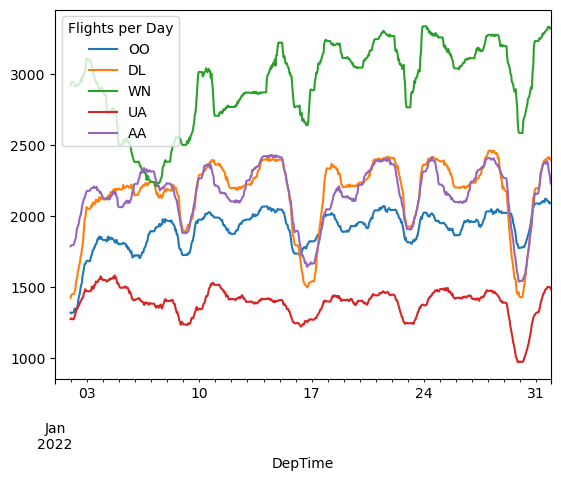

In [28]:
(
    df_pl_pivot.to_pandas()
    .set_index("DepTime")
    .rename_axis("Flights per Day", axis=1)
    .plot()
)

In [44]:
(
    alt.Chart(
        df_pl_pivot
        .unpivot(
            index="DepTime",
            variable_name="IATA_CODE_Reporting_Airline",
            value_name="Flight_Number_Reporting_Airline",
        ),
        height=600,
        width=800,
    )
    .mark_line()
    .encode(
        x="DepTime",
        y="Flight_Number_Reporting_Airline",
        color="IATA_CODE_Reporting_Airline",
    )
)

alt.Chart(...)

C:\Users\mchan811\AppData\Local\Temp\ipykernel_23920\2650972444.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(


<Axes: xlabel='DepTime'>

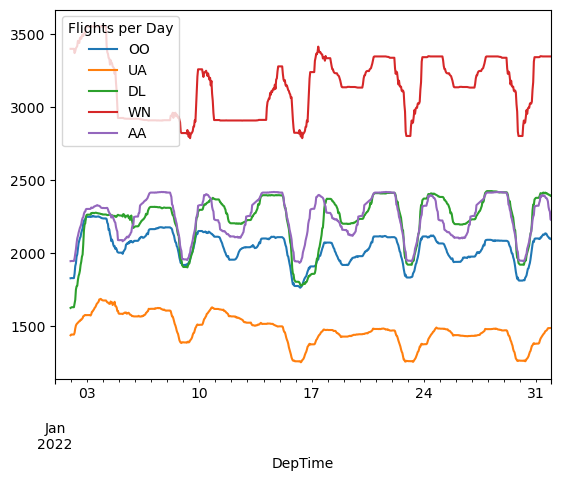

In [45]:
(
    df_pd_parsed
    .dropna(subset=["DepTime", "IATA_CODE_Reporting_Airline"])
    .loc[
        lambda df: df["IATA_CODE_Reporting_Airline"].isin(
            df["IATA_CODE_Reporting_Airline"].value_counts().index[:5]
        )
    ]
    .assign(
        IATA_CODE_Reporting_Airline=lambda df: (
            df["IATA_CODE_Reporting_Airline"].cat.remove_unused_categories()
        )
    )
    .set_index("DepTime")
    .groupby(
        ["IATA_CODE_Reporting_Airline", pd.Grouper(freq="h")]
    )
    .count()
    .loc[:, "Flight_Number_Reporting_Airline"]
    .unstack(0)
    .fillna(0)
    .rolling(24)
    .sum()
    .rename_axis("Flights per Day", axis=1)
    .plot()
)

In [46]:
df_pl_pivot.plot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)